# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:
- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

**Инструкция по выполнению проекта**

Загрузите и подготовьте данные. Поясните порядок действий.

Обучите и проверьте модель для каждого региона:

2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.

2.2. Обучите модель и сделайте предсказания на валидационной выборке.

2.3. Сохраните предсказания и правильные ответы на валидационной выборке.

2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

2.5. Проанализируйте результаты.

Подготовьтесь к расчёту прибыли:

3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.

3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.

3.3. Напишите выводы по этапу подготовки расчёта прибыли.

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

4.1. Выберите скважины с максимальными значениями предсказаний.

4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

4.3. Рассчитайте прибыль для полученного объёма сырья.

Посчитайте риски и прибыль для каждого региона:

5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

**Описание данных**

Данные геологоразведки трёх регионов находятся в файлах:
- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:**

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Подготовка данных

Импортирую необходимые для исследования библиотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Ознакомлюсь с данными.

In [2]:
try:  
    data_0 = pd.read_csv('C:/project/geo_data_0.csv')
except OSError as e:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(data_0.head(10))
display(data_0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [3]:
try:  
    data_1 = pd.read_csv('C:/project/geo_data_1.csv')
except OSError as e:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(data_1.head(10))
display(data_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
try:  
    data_2 = pd.read_csv('C:/project/geo_data_2.csv')
except OSError as e:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(data_2.head(10))
display(data_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Проверю данные на наличие выбивающихся значений.

In [5]:
def data_values(data):
    for column in data.columns:
        print('Значения столбца', column)
        print(data[column].sort_values().unique())

In [6]:
data_values(data_0)

Значения столбца id
['006OJ' '009eY' '00AfQ' ... 'zztWK' 'zzyhQ' 'zzzLH']
Значения столбца f0
[-1.40860531 -1.35177299 -1.30222711 ...  2.33375269  2.33707957
  2.36233081]
Значения столбца f1
[-0.8482185  -0.84490792 -0.8205609  ...  1.33334561  1.33482762
  1.34376933]
Значения столбца f2
[-12.08832812 -10.13834135 -10.13817115 ...  15.23032159  15.42837187
  16.00379001]
Значения столбца product
[0.00000000e+00 4.02152316e-03 6.11363631e-03 ... 1.85355615e+02
 1.85362690e+02 1.85364347e+02]


В столбце product имеются нули.

In [7]:
display(data_0[data_0['product'] == 0]['product'].count())

1

In [8]:
data_values(data_1)

Значения столбца id
['0022J' '003Gl' '003Vx' ... 'zzv4E' 'zzy2c' 'zzzvI']
Значения столбца f0
[-31.60957602 -27.82961614 -26.64625507 ...  28.93082879  29.25906208
  29.42175461]
Значения столбца f1
[-26.35859801 -25.38962242 -25.2915177  ...  16.0268693   16.7371962
  18.73406263]
Значения столбца f2
[-0.01814409 -0.01788668 -0.01768626 ...  5.01750345  5.01909142
  5.01972056]
Значения столбца product
[  0.           3.17910258  26.95326103  30.13236361  53.90652206
  57.08562465  80.85978309  84.03888568 107.81304413 110.99214671
 134.76630516 137.94540774]


В столбце product имеются нули.

In [9]:
display(data_1[data_1['product'] == 0]['product'].count())

8235

In [10]:
data_values(data_2)

Значения столбца id
['009Gl' '00AuD' '00CaL' ... 'zzqqy' 'zzsKd' 'zzz9h']
Значения столбца f0
[-8.76000362 -7.45058711 -7.18949804 ...  7.19461485  7.21552717
  7.23826248]
Значения столбца f1
[-7.08401976 -6.74835677 -6.73299712 ...  7.10161842  7.76185714
  7.84480127]
Значения столбца f2
[-11.97033454 -11.61169048 -11.40724351 ...  16.31301122  16.35764509
  16.73940206]
Значения столбца product
[0.00000000e+00 4.60600004e-03 9.20411196e-03 ... 1.90011722e+02
 1.90013589e+02 1.90029838e+02]


В столбце product имеются нули.

In [11]:
display(data_2[data_2['product'] == 0]['product'].count())

1

Удалю из данных столбец id, так как его значения влияют на исследование.

In [12]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

Удалю строки-дубликаты, если такие имеются.

In [13]:
data_0 = data_0.drop_duplicates()
data_1 = data_1.drop_duplicates()
data_2 = data_2.drop_duplicates()
data_0.info()
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

Приведу столбец product к типу данных int 64.

In [14]:
data_0 = data_0.astype({"product": "int64"})
data_1 = data_1.astype({"product": "int64"})
data_2 = data_2.astype({"product": "int64"})
data_0.info()
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-nu

Построю гистограммы по столбцу product для визуального понимания количества продукта в скважинах.

In [15]:
def product_hist(data):
    plt.figure(figsize=[12,9])

    plt.hist(data, bins=200)

    plt.xlim([0,180])
    plt.ylim([0,850])

    plt.xlabel("Объём запасов продукта в скважине, тыс. барелей")
    plt.ylabel("Количество скважин, шт")

    plt.title("Гистограмма распределения продукта в скважинах")
    plt.show()

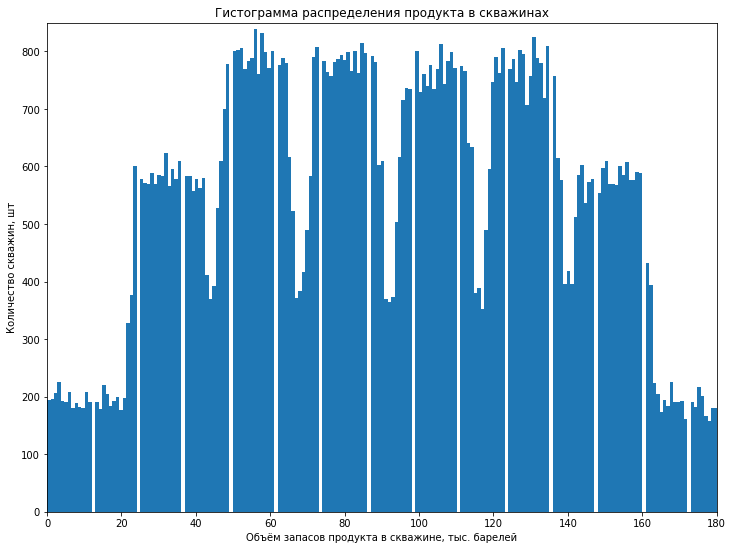

In [16]:
product_hist(data_0['product'])

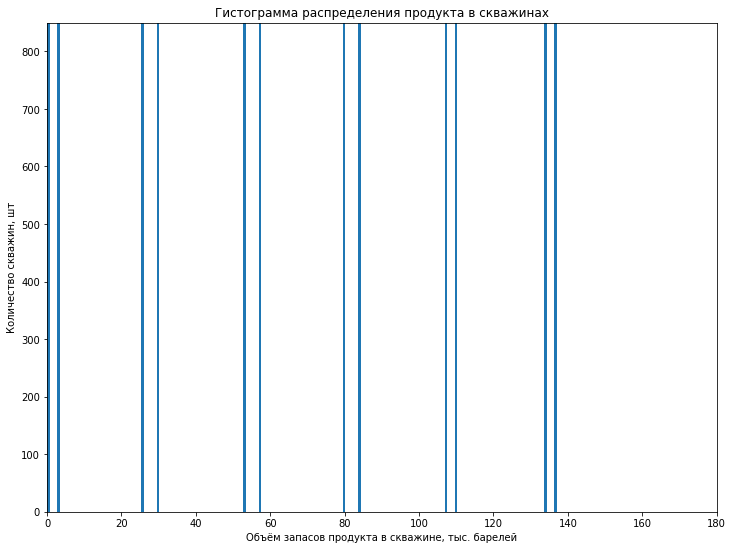

In [17]:
product_hist(data_1['product'])

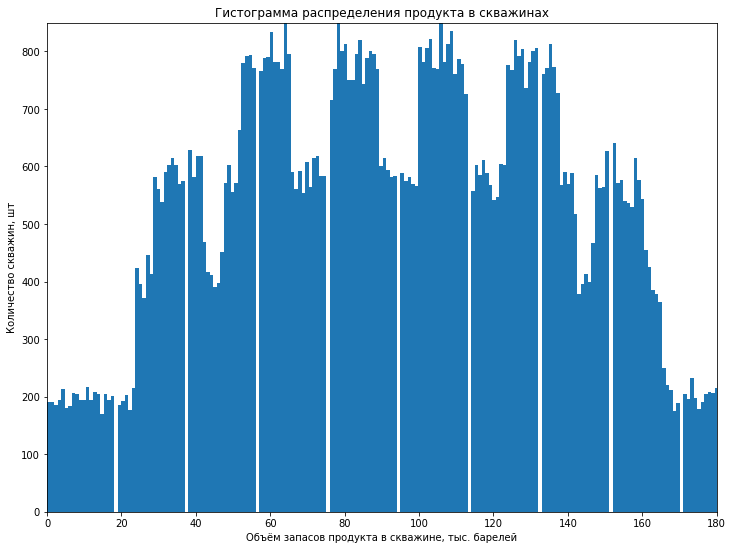

In [18]:
product_hist(data_2['product'])

### Вывод

Данные изучены и подготовленны к исследованию.

В некоторых строках столбец product имеет нули, считаю, что это говорит об отсутствии продукта в данной скважине.

Гистограмма данных data_1 отличается от гистограмм данных data_0 и data_2. Гистограммы data_0 и data_2 имеют распределение близкое к нормальному, но гистограмма data_1 имеет всплески через равные промежутки, что наводит на мысль об исскуственной подгонке данных.

## Обучение и проверка модели

Выберу наилучшую модель для предсказания.

### Модель для первого региона

Создам обучающую и валидационную выборки в соотношении 75:25.

In [19]:
target_data_0 = data_0['product']
features_data_0 = data_0.drop('product', axis=1)

features_train_data_0, features_valid_data_0, target_train_data_0, target_valid_data_0 = train_test_split(
    features_data_0, target_data_0, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_0.shape[0])
print('Размер валидационной выборки', features_valid_data_0.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучу StandardScaler() на обучающей выборке.

In [20]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_0[numeric])
features_train_data_0[numeric] = scaler.transform(features_train_data_0[numeric])
features_valid_data_0[numeric] = scaler.transform(features_valid_data_0[numeric])

display(features_train_data_0.head())

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


Рассчитаю RMSE модели.

In [21]:
model = LinearRegression()
model.fit(features_train_data_0, target_train_data_0)
predictions_0 = model.predict(features_valid_data_0)
RMSE_0 = mean_squared_error(target_valid_data_0, predictions_0) **0.5  
print(RMSE_0)

37.58106136304993


Сохраню предсказания и правильные ответы на валидационной выборке.

Выведу на экран средний запас предсказанного сырья и RMSE модели.

In [22]:
data_0_product = {'real_product' : target_valid_data_0,
                 'predicted_product' : predictions_0}

product_0 = pd.DataFrame(data_0_product, columns = ['real_product', 'predicted_product'])

print(product_0.head())
print('RMSE -', RMSE_0)
print('Среднее колмчество сырья по данным -', product_0['real_product'].mean())
print('Среднее количество сырья по модели -', product_0['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_0['real_product'].sum())
print('Суммарное количество сырья по модели -', product_0['predicted_product'].sum())

       real_product  predicted_product
71751            10          95.395567
80493           114          77.074974
2655            132          77.395344
53233           169          89.676522
91141           122          70.012879
RMSE - 37.58106136304993
Среднее колмчество сырья по данным - 91.58064
Среднее количество сырья по модели - 92.0933978221753
Суммарное количество сырья по данным - 2289516
Суммарное количество сырья по модели - 2302334.9455543826


Предсказанные данные очень близки к реальным.

### Модель для второго региона

Создам обучающую и валидационную выборки в соотношении 75:25.

In [23]:
target_data_1 = data_1['product']
features_data_1 = data_1.drop('product', axis=1)

features_train_data_1, features_valid_data_1, target_train_data_1, target_valid_data_1 = train_test_split(
    features_data_1, target_data_1, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_1.shape[0])
print('Размер валидационной выборки', features_valid_data_1.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучу StandardScaler() на обучающей выборке.

In [24]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_1[numeric])
features_train_data_1[numeric] = scaler.transform(features_train_data_1[numeric])
features_valid_data_1[numeric] = scaler.transform(features_valid_data_1[numeric])

display(features_train_data_1.head())

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


Рассчитаю RMSE модели.

In [25]:
model = LinearRegression()
model.fit(features_train_data_1, target_train_data_1)
predictions_1 = model.predict(features_valid_data_1)
RMSE_1 = mean_squared_error(target_valid_data_1, predictions_1) **0.5  
print(RMSE_1)

1.0231340913429754


Сохраню предсказания и правильные ответы на валидационной выборке.

Выведу на экран средний запас предсказанного сырья и RMSE модели.

In [26]:
data_1_product = {'real_product' : target_valid_data_1,
                 'predicted_product' : predictions_1}

product_1 = pd.DataFrame(data_1_product, columns = ['real_product', 'predicted_product'])

print(product_1.head())
print('RMSE -', RMSE_1)
print('Среднее колмчество сырья по данным -', product_1['real_product'].mean())
print('Среднее количество сырья по модели -', product_1['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_1['real_product'].sum())
print('Суммарное количество сырья по модели -', product_1['predicted_product'].sum())

       real_product  predicted_product
71751            80          82.051695
80493            53          53.852795
2655             30          29.513214
53233            53          52.881814
91141             0           0.956905
RMSE - 1.0231340913429754
Среднее колмчество сырья по данным - 68.1672
Среднее количество сырья по модели - 68.17320024946817
Суммарное количество сырья по данным - 1704180
Суммарное количество сырья по модели - 1704330.0062367043


Предсказанные данные практически совпадают с реальными, что ещё раз подтверждает исскуственность их появления.

### Модель для третьего региона

Создам обучающую и валидационную выборки в соотношении 75:25.

In [27]:
target_data_2 = data_2['product']
features_data_2 = data_2.drop('product', axis=1)

features_train_data_2, features_valid_data_2, target_train_data_2, target_valid_data_2 = train_test_split(
    features_data_2, target_data_2, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_2.shape[0])
print('Размер валидационной выборки', features_valid_data_2.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучу StandardScaler() на обучающей выборке.

In [28]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_2[numeric])
features_train_data_2[numeric] = scaler.transform(features_train_data_2[numeric])
features_valid_data_2[numeric] = scaler.transform(features_valid_data_2[numeric])

display(features_train_data_2.head())

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


Рассчитаю RMSE модели.

In [29]:
model = LinearRegression()
model.fit(features_train_data_2, target_train_data_2)
predictions_2 = model.predict(features_valid_data_2)
RMSE_2 = mean_squared_error(target_valid_data_2, predictions_2) **0.5  
print(RMSE_2)

40.03077959471606


Сохраню предсказания и правильные ответы на валидационной выборке.

Выведу на экран средний запас предсказанного сырья и RMSE модели.

In [30]:
data_2_product = {'real_product' : target_valid_data_2,
                  'predicted_product' : predictions_2}

product_2 = pd.DataFrame(data_2_product, columns = ['real_product', 'predicted_product'])

print(product_2.head())
print('RMSE -', RMSE_2)
print('Среднее колмчество сырья по данным -', product_2['real_product'].mean())
print('Среднее количество сырья по модели -', product_2['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_2['real_product'].sum())
print('Суммарное количество сырья по модели -', product_2['predicted_product'].sum())

       real_product  predicted_product
71751            61          93.104699
80493            41          74.605623
2655             57          89.567874
53233           100         104.664264
91141           109         114.801980
RMSE - 40.03077959471606
Среднее колмчество сырья по данным - 94.3854
Среднее количество сырья по модели - 94.46742884611454
Суммарное количество сырья по данным - 2359635
Суммарное количество сырья по модели - 2361685.7211528635


Предсказанные данные очень близки к реальным.

### Вывод

Модели для трех различных регионов предсказали очень близкие к реальным значения:

Для первого региона:
- Среднее колмчество сырья по данным - 91.58064
- Среднее количество сырья по модели - 92.0933978221753
- Суммарное количество сырья по данным - 2289516
- Суммарное количество сырья по модели - 2302334.9455543826

Для второго региона:
- Среднее колмчество сырья по данным - 68.1672
- Среднее количество сырья по модели - 68.17320024946817
- Суммарное количество сырья по данным - 1704180
- Суммарное количество сырья по модели - 1704330.0062367043

Для третьего региона:
- Среднее колмчество сырья по данным - 94.3854
- Среднее количество сырья по модели - 94.46742884611454
- Суммарное количество сырья по данным - 2359635
- Суммарное количество сырья по модели - 2361685.7211528635

## Подготовка к расчёту прибыли

Ключевые значения для расчётов сохраню в отдельные переменные.

In [32]:
BUDGET = 1e+07
ALL_AREA = 500
BEST_AREA = 200
PRICE_PER_BARREL = 450

Расчитаю безубыточную разработку сырья на 200 скважинах. Также найду среднее количество сырья в скважинах необходимое для этого.

In [33]:
average_profit = BUDGET / BEST_AREA
print('Средняя прибыль на лучшем месторождении -', average_profit, 'тыс.руб.')

average_barrels = average_profit  / PRICE_PER_BARREL
print('Средний объем нефти на лучшем месторождении -',average_barrels, 'тыс. барелей')

average_barrels = BUDGET / PRICE_PER_BARREL
print('Средний объем нефти на регион -',average_barrels, 'тыс. барелей')

Средняя прибыль на лучшем месторождении - 50000.0 тыс.руб.
Средний объем нефти на лучшем месторождении - 111.11111111111111 тыс. барелей
Средний объем нефти на регион - 22222.222222222223 тыс. барелей


Помотрю какое в среднем количество сырья на скважинах по регионам.

In [34]:
print('Средний запас сырья на скважину в регионе 1', data_0['product'].mean(), 'тыс. барелей')
print('Средний запас сырья на скважину в регионе 2', data_1['product'].mean(), 'тыс. барелей')
print('Средний запас сырья на скважину в регионе 3', data_2['product'].mean(), 'тыс. барелей')

Средний запас сырья на скважину в регионе 1 92.00113 тыс. барелей
Средний запас сырья на скважину в регионе 2 68.26903 тыс. барелей
Средний запас сырья на скважину в регионе 3 94.50209 тыс. барелей


Создам функцию для расчета прибыли.

In [35]:
def profit_all(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return PRICE_PER_BARREL * selected.sum() - BUDGET

### Вывод

Получил необходимые данные по безубыточной разработке сырья на 200 лучших скважинах из отобранных 500.
- Средняя прибыль на лучшем месторождении - 50000.0 тыс.руб.
- Средний объем нефти на лучшем месторождении - 111.11111111111111 тыс. барелей
- Средний объем нефти на регион - 22222.222222222223 тыс. барелей

В сравнении с полученными средними запасами сырья на скважину в каждом регионе считаю, что в первом и третьем регионе скважины будут окупаемы.

Создал функцию для расчета прибыли.

## Расчёт прибыли и рисков 

Применю технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [36]:
state = np.random.RandomState(12345)
def bootstrap(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=all_area)
        probs_sample = probs[target_sample.index]
        profit = profit_all(target, probs_sample, best_area)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

Рассчитаю прибыль и риски по каждому региону.

In [37]:
average_0, lower_0, upper_0, risk_0 = bootstrap(product_0['real_product'], product_0['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону = 350978.75 тыс.руб.
95% доверительный интервал от -156722.50 до 863641.25 тыс.руб.
Процент риска 9.20%


In [38]:
average_1, lower_1, upper_1, risk_1 = bootstrap(product_1['real_product'], product_1['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по второму региону.
Средняя прибыль по региону = 394299.80 тыс.руб.
95% доверительный интервал от 13197.50 до 790133.75 тыс.руб.
Процент риска 2.20%


In [39]:
average_2, lower_2, upper_2, risk_2 = bootstrap(product_2['real_product'], product_2['predicted_product'])
print('Данные по третьему региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по третьему региону.
Средняя прибыль по региону = 348230.15 тыс.руб.
95% доверительный интервал от -158511.25 до 888908.75 тыс.руб.
Процент риска 9.30%


### Вывод

Значения средней прибыли и процент риска по регионам следующие:

Данные по первому региону.
- Средняя прибыль по региону = 350978.75 тыс.руб.
- 95% доверительный интервал от -156722.50 до 863641.25 тыс.руб.
- Процент риска 9.20%

Данные по второму региону.
- Средняя прибыль по региону = 394299.80 тыс.руб.
- 95% доверительный интервал от 13197.50 до 790133.75 тыс.руб.
- Процент риска 2.20%

Данные по третьему региону.
- Средняя прибыль по региону = 348956.00 тыс.руб.
- 95% доверительный интервал от -160918.75 до 912882.50 тыс.руб.
- Процент риска 10.10%

## Итоговый вывод

В ходе исследования я изучил данные по трем регионам и построил модель, предсказывающую количесвтво сырья в скважинах.

Затем я написал функцию по расчету средней прибыли добычи сырья.

В ходе расчета средней прибыли и процента риска я определил, что наилучшим регионом для добычи является второй регион. Но данные для этого региона наводят на мысль об их исскуственности.

Из всего вышесказанного я делаю вывод, что наилучший регион для добычи сырья является первый. Его показатели следующие:
- Средняя прибыль по региону = 350978.75 тыс.руб.
- 95% доверительный интервал от -156722.50 до 863641.25 тыс.руб.
- Процент риска 9.20%